In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os
import maup
import multiprocessing as mp
from pyproj import CRS

In [2]:
# Get the current working directory
current_directory = os.getcwd()
move_up = os.path.dirname(current_directory)
client_dir = os.path.join(move_up, 'client')
data_dir = os.path.join(client_dir, 'public')
new_path = os.chdir(os.path.join(data_dir, 'MS'))
print(os.getcwd())

/Users/aaronlin/Downloads/Spring 2024/CSE 416/cse416-gui/client/public/MS


In [15]:
block_data_bigfile1 = gpd.read_file('ms_pl2020_b/ms_pl2020_h1p5_b.shp')

In [ ]:
display(block_data_bigfile1.columns)

In [13]:
race_data_bigfile = gpd.read_file('ms_pl2020_b/ms_pl2020_p1_b.shp')

,GEOID20,SUMLEV,LOGRECNO,GEOID,COUNTY,P0010001,P0010002,P0010003,P0010004,P0010005,...,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,geometry
0,280379502004029,750,0079606,7500000US280379502004029,037,7,6,3,2,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-91.04601 31.50530, -91.04600 31.505..."
1,280379502001070,750,0079419,7500000US280379502001070,037,3,3,1,2,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-91.15524 31.49876, -91.15522 31.500..."
2,280279501002021,750,0069815,7500000US280279501002021,027,6,6,1,5,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-90.46873 34.29211, -90.46872 34.292..."
3,280279501004056,750,0069999,7500000US280279501004056,027,9,9,2,7,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-90.47911 34.45332, -90.47857 34.454..."
4,280139503001043,750,0064524,7500000US280139503001043,013,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.45825 33.93295, -89.45819 33.933..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112236,281099504052016,750,0137548,7500000US281099504052016,109,42,42,32,10,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.70552 30.55195, -89.70551 30.552..."
112237,281099507012013,750,0138257,7500000US281099507012013,109,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.69131 30.51596, -89.69119 30.516..."
112238,281099504032012,750,0137351,7500000US281099504032012,109,90,82,76,0,3,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.72224 30.51774, -89.72217 30.517..."
112239,280939503023020,750,0127117,7500000US280939503023020,093,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-89.49329 34.79665, -89.49322 34.796..."


In [ ]:
display(race_data_bigfile)

# Data

---

- [ ] Find Precinct Data (Nevada + Mississippi)
- [ ] Find State Assembly Shapefile
- [ ] Demographic Population

# Pre-processing

---

- [ ] Read ShapeFile
- [ ] Convert ShapeFile -> GeoJSON
- [ ] Multi-threaded and Parallelize Code
- [ ] 

### Mississippi State Assembly Data Processing

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Index(['ID', 'AREA', 'DISTRICT', 'MEMBERS', 'LOCKED', 'NAME', 'POPULATION',
       'WHITE', 'BLACK', 'F18_POP', 'F18_WHT', 'F18_BLK', 'F18_AP_BLK',
       'IDEAL_VALU', 'DEVIATION', 'F_DEVIATIO', 'F_WHITE', 'F_BLACK',
       'F_18_POP', 'F_18_WHT', 'F_18_BLK', 'DIST_NUM', 'F_18_AP_BL',
       'DISTRICT_L', 'MULTIPLE_F', 'MULTIPLE_1', 'OTH', 'LABEL', 'Distnum',
       'Sen_Shade', 'Shade_Num', 'Dist20', 'geometry'],
      dtype='object')

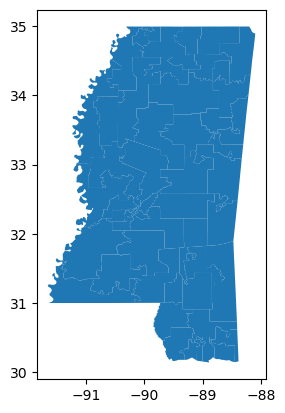

In [43]:
ms_districts_df = gpd.read_file('ms_State_Assembly_2022.geojson')
ms_districts_df.plot()

# plt.show()

ms_districts_df.to_crs(epsg=4326, inplace=True)
display(ms_districts_df.crs)
display(ms_districts_df.columns)

# ms_districts_df.to_file('ms_State_Assembly_2022.geojson', driver='GeoJSON')


Data gathered from [Redistricting Data](https://redistrictingdatahub.org/dataset/2022-mississippi-senate-districts-approved-plan/)

### Demographic Data on Block Level

,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,...,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,HVAP,LOGRECNO,GEOCODE,SUMLEV,districtr,geometry
0,28,151,000300,3,281510003003,Block Group 3,G5030,S,2322883,0,...,0,0,0,6,3,3684,281510003003,150,-1,"MULTIPOLYGON (((-91.05266 33.42556, -91.05213 ..."
1,28,151,001500,2,281510015002,Block Group 2,G5030,S,38328376,227053,...,7,0,0,13,13,3719,281510015002,150,-1,"MULTIPOLYGON (((-91.14362 33.32827, -91.14362 ..."
2,28,151,000800,1,281510008001,Block Group 1,G5030,S,16951616,16692,...,14,0,0,22,11,3701,281510008001,150,-1,"MULTIPOLYGON (((-91.11184 33.32652, -91.11179 ..."
3,28,151,001400,2,281510014002,Block Group 2,G5030,S,816612,0,...,0,0,0,4,1,3715,281510014002,150,-1,"MULTIPOLYGON (((-91.03799 33.39472, -91.03791 ..."
4,28,151,000100,1,281510001001,Block Group 1,G5030,S,729919265,7673494,...,0,1,0,17,19,3678,281510001001,150,-1,"MULTIPOLYGON (((-90.98937 33.44372, -90.98885 ..."


Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLKGRPCE20', 'GEOID20',
       'NAMELSAD20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20',
       'INTPTLAT20', 'INTPTLON20', 'TOTPOP', 'WHITE', 'BLACK', 'AMIN', 'ASIAN',
       'NHPI', 'OTHER', '2MORE', 'HISP', 'VAP', 'WVAP', 'BVAP', 'AMINVAP',
       'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'HVAP', 'LOGRECNO',
       'GEOCODE', 'SUMLEV', 'districtr', 'geometry'],
      dtype='object')

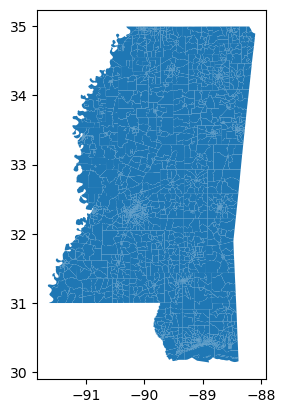

In [3]:
ms_block_race_df = gpd.read_file('ms-block-demo-2020.geojson')

# ms_block_race_df['area'] = ms_block_race_df['geometry'].area
# ms_block_race_df.explore('area', legend=False)
# ms_block_race_df.explore('STATEFP20', legend=False)
ms_block_race_df.plot()
display(ms_block_race_df.head())
display(ms_block_race_df.columns)

# https://redistrictingdatahub.org/dataset/mississippi-2022-select-race-data-from-the-american-community-survey-20182022-at-the-block-group-level/
# diff_block_df = gpd.read_file('MS/ms_race_2022_bg/ms_race_2022_bg.shp')
# display(diff_block_df.isna().sum())
# display(diff_block_df.columns)


# fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 16))
# ax1 = diff_block_df.plot(ax=ax1)
# ax2 = ms_block_race_df.plot(ax=ax2)

Data from [Districtr](https://districtr.org/plan)

### General Elections Precinct Data + Geometry

,UNIQUE_ID,COUNTYFP,CNTY_CODE,CNTY_NAME,POLL_LOC,GCON04LJOH,GCON02DTHO,GCON02RFLO,GCON01DBLA,GCON04DDUP,GCON03RGUE,GCON04REZE,GCON03DYOU,GCON01RKEL,geometry
0,1 ACONA:::HOL,051,HOL,HOLMES,1 ACONA,0,269,21,0,0,0,0,0,0,"POLYGON ((-90.13841 33.32312, -90.13613 33.322..."
1,1 DURANT ST ANDERSON:::HOL,051,HOL,HOLMES,1 DURANT ST ANDERSON,0,116,10,0,0,0,0,0,0,"POLYGON ((-89.86155 33.07284, -89.86137 33.072..."
2,101 - ONE:::LAU,075,LAU,LAUDERDALE,101 - ONE,0,0,0,0,0,579,0,277,0,"POLYGON ((-88.69259 32.43920, -88.69040 32.439..."
3,105 - FIVE:::LAU,075,LAU,LAUDERDALE,105 - FIVE,0,0,0,0,0,565,0,243,0,"POLYGON ((-88.70125 32.39303, -88.70124 32.393..."
4,11 - INVERNESS:::SUN,133,SUN,SUNFLOWER,11 - INVERNESS,0,168,249,0,0,0,0,0,0,"POLYGON ((-90.72519 33.28016, -90.72465 33.281..."


<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

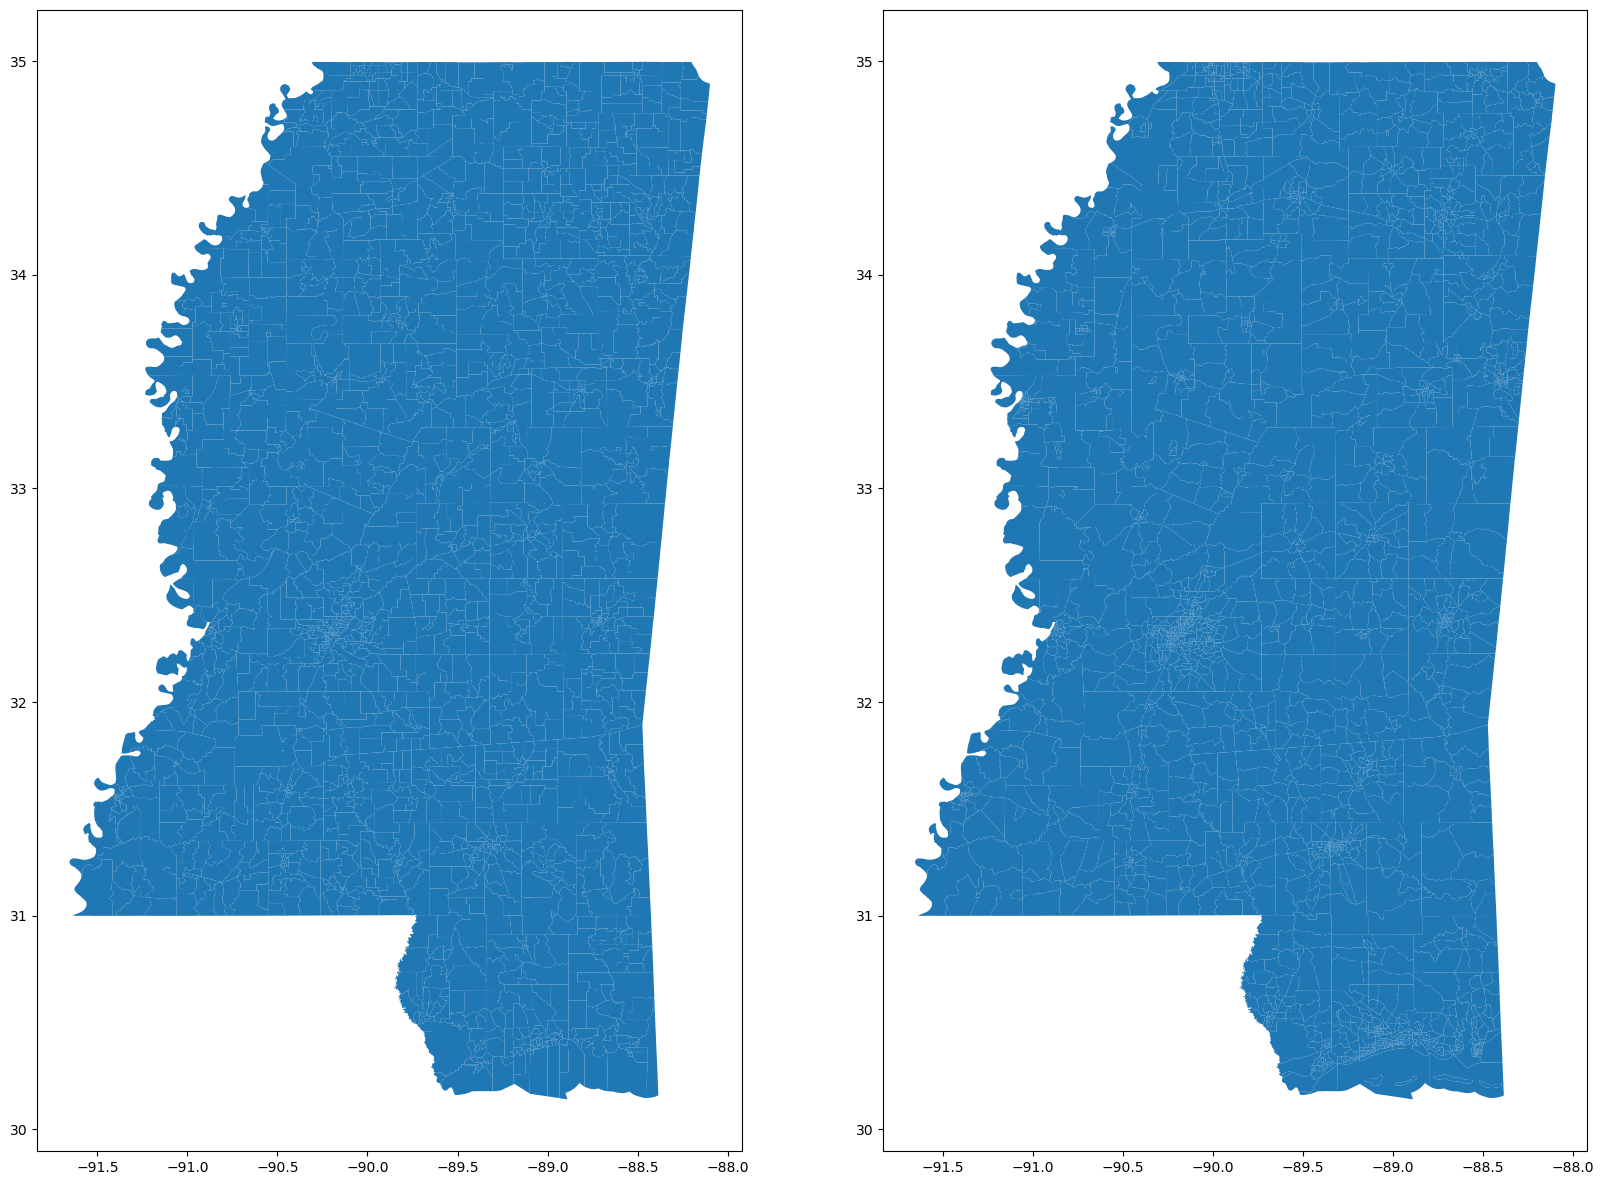

In [45]:
ms_prec_bound_2022_df = gpd.read_file('ms_gen_22_prec/ms_gen_22_prec.shp')
# ms_prec_bound_2022_df.to_file('msGenPrecBound2022', driver='GeoJSON')
# ms_prec_bound_2022_df.explore()

display(ms_prec_bound_2022_df.head())
display(ms_prec_bound_2022_df.crs, ms_block_race_df.crs)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 16))
ax1 = ms_prec_bound_2022_df.plot(ax=ax1)
ax2 = ms_block_race_df.plot(ax=ax2)

Data from [Redistricting Hub](https://redistrictingdatahub.org/dataset/mississippi-2022-general-election-precinct-level-results-and-boundaries/)

In [46]:
ms_prec_data = ms_prec_bound_2022_df
display(ms_prec_data.columns)

ms_block_data = ms_block_race_df
display(ms_block_data.columns)

ms_block_data.to_crs(32030, inplace=True)
ms_prec_data.to_crs(32030, inplace=True)
display(ms_prec_data.crs)


Index(['UNIQUE_ID', 'COUNTYFP', 'CNTY_CODE', 'CNTY_NAME', 'POLL_LOC',
       'GCON04LJOH', 'GCON02DTHO', 'GCON02RFLO', 'GCON01DBLA', 'GCON04DDUP',
       'GCON03RGUE', 'GCON04REZE', 'GCON03DYOU', 'GCON01RKEL', 'geometry'],
      dtype='object')

Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLKGRPCE20', 'GEOID20',
       'NAMELSAD20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20',
       'INTPTLAT20', 'INTPTLON20', 'TOTPOP', 'WHITE', 'BLACK', 'AMIN', 'ASIAN',
       'NHPI', 'OTHER', '2MORE', 'HISP', 'VAP', 'WVAP', 'BVAP', 'AMINVAP',
       'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'HVAP', 'LOGRECNO',
       'GEOCODE', 'SUMLEV', 'districtr', 'geometry'],
      dtype='object')

<Projected CRS: EPSG:32030>
Name: NAD27 / Rhode Island
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Rhode Island - counties of Bristol; Kent; Newport; Providence; Washington.
- bounds: (-71.85, 41.13, -71.08, 42.02)
Coordinate Operation:
- name: Rhode Island CS27
- method: Transverse Mercator
Datum: North American Datum 1927
- Ellipsoid: Clarke 1866
- Prime Meridian: Greenwich

In [41]:
# maup.doctor(ms_block_data)
maup.doctor(ms_prec_data)
# print(ms_prec_data.geometry.is_valid)

GEOSException: TopologyException: side location conflict at -5067587.4937315769 -3452449.103093531. This can occur if the input geometry is invalid.

In [47]:
display(ms_prec_data.estimate_utm_crs())
ms_prec_data.to_crs(epsg=32030, inplace=True)
ms_prec_data = maup.smart_repair(ms_prec_data)

<Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 90°W and 84°W, northern hemisphere between equator and 84°N, onshore and offshore. Belize. Canada - Manitoba; Nunavut; Ontario. Costa Rica. Cuba. Ecuador - Galapagos. El Salvador. Guatemala. Honduras. Mexico. Nicaragua. United States (USA).
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Snapping all geometries to a grid with precision 10^( -4 ) to avoid GEOS errors.
Identifying overlaps...
Resolving overlaps...
Assigning order 2 pieces...
Assigning order 3 pieces...
Filling gaps...


Gaps to fill: 100%|█████████████████████████████| 81/81 [00:09<00:00,  8.27it/s]


In [48]:
ms_prec_data
block_prec_aggr = maup.assign(ms_block_data, ms_prec_data)
display(ms_prec_data.columns.intersection(ms_block_data.columns))


Index(['geometry'], dtype='object')

In [50]:
display(ms_prec_data)
ms_prec_data.to_file("fixed_ms_prec_geom.geojson", driver="GeoJSON")

,UNIQUE_ID,COUNTYFP,CNTY_CODE,CNTY_NAME,POLL_LOC,GCON04LJOH,GCON02DTHO,GCON02RFLO,GCON01DBLA,GCON04DDUP,GCON03RGUE,GCON04REZE,GCON03DYOU,GCON01RKEL,geometry
0,1 ACONA:::HOL,051,HOL,HOLMES,1 ACONA,0,269,21,0,0,0,0,0,0,"POLYGON ((-5233172.640 -2302084.499, -5232504...."
1,1 DURANT ST ANDERSON:::HOL,051,HOL,HOLMES,1 DURANT ST ANDERSON,0,116,10,0,0,0,0,0,0,"POLYGON ((-5163779.527 -2410852.239, -5163748...."
2,101 - ONE:::LAU,075,LAU,LAUDERDALE,101 - ONE,0,0,0,0,0,579,0,277,0,"POLYGON ((-4838143.350 -2709510.308, -4837454...."
3,105 - FIVE:::LAU,075,LAU,LAUDERDALE,105 - FIVE,0,0,0,0,0,565,0,243,0,"POLYGON ((-4830087.779 -2719826.507, -4830079...."
4,11 - INVERNESS:::SUN,133,SUN,SUNFLOWER,11 - INVERNESS,0,168,249,0,0,0,0,0,0,"POLYGON ((-5419263.799 -2283554.722, -5419030...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,WHITE OAK REC. CENTER:::TUN,143,TUN,TUNICA,WHITE OAK REC. CENTER,0,92,35,0,0,0,0,0,0,"MULTIPOLYGON (((-5176276.754 -1821865.187, -51..."
1751,WHITE PLAINS:::HAR,047,HAR,HARRISON,WHITE PLAINS,9,0,0,0,80,0,442,0,0,"POLYGON ((-5022005.860 -3413953.100, -5022322...."
1752,WORKFORCE CENTER:::TUN,143,TUN,TUNICA,WORKFORCE CENTER,0,46,23,0,0,0,0,0,0,"POLYGON ((-5198101.299 -1751648.998, -5198215...."
1753,YAWN:::LAM,073,LAM,LAMAR,YAWN,4,0,0,0,5,0,175,0,0,"POLYGON ((-5158880.441 -3201538.435, -5158886...."


In [51]:
display(ms_prec_data.columns)
display(ms_block_data.columns)

Index(['UNIQUE_ID', 'COUNTYFP', 'CNTY_CODE', 'CNTY_NAME', 'POLL_LOC',
       'GCON04LJOH', 'GCON02DTHO', 'GCON02RFLO', 'GCON01DBLA', 'GCON04DDUP',
       'GCON03RGUE', 'GCON04REZE', 'GCON03DYOU', 'GCON01RKEL', 'geometry'],
      dtype='object')

Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLKGRPCE20', 'GEOID20',
       'NAMELSAD20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20',
       'INTPTLAT20', 'INTPTLON20', 'TOTPOP', 'WHITE', 'BLACK', 'AMIN', 'ASIAN',
       'NHPI', 'OTHER', '2MORE', 'HISP', 'VAP', 'WVAP', 'BVAP', 'AMINVAP',
       'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'HVAP', 'LOGRECNO',
       'GEOCODE', 'SUMLEV', 'districtr', 'geometry'],
      dtype='object')

### Redistrcting Hub Precinct Level Data + Districtr Block Demographic Data provided better geometry

In [54]:
variables = ['TOTPOP', 'WHITE', 'BLACK', 'ASIAN', 'HISP']

ms_prec_data[variables] = ms_block_data[variables].groupby(block_prec_aggr).sum()


# display(ms_prec_data[variables].head())
# display(ms_prec_data.isna().sum())
# display(ms_prec_data)
# ms_prec_data.plot()

UNIQUE_ID       0
COUNTYFP        0
CNTY_CODE       0
CNTY_NAME       0
POLL_LOC        0
GCON04LJOH      0
GCON02DTHO      0
GCON02RFLO      0
GCON01DBLA      0
GCON04DDUP      0
GCON03RGUE      0
GCON04REZE      0
GCON03DYOU      0
GCON01RKEL      0
geometry        0
TOTPOP        411
WHITE         411
BLACK         411
ASIAN         411
HISP          411
dtype: int64

In [55]:
ms_prec_data['2022_DEMOCRATIC'] = ms_prec_data[['GCON01DBLA', 'GCON02DTHO', 'GCON03DYOU', 'GCON04DDUP']].sum(axis=1)
ms_prec_data['2022_REPUBLICAN'] = ms_prec_data[['GCON01RKEL', 'GCON02RFLO', 'GCON03RGUE', 'GCON04REZE']].sum(axis=1)
ms_prec_data['2022_LIBERAL'] = ms_prec_data[['GCON04LJOH']].sum(axis=1)

# display(ms_prec_data)

ms_prec_data['border'] = ms_prec_data.buffer(200)

# ms_prec_data['border'].plot()
rows = [row for _, row in ms_prec_data.groupby(ms_prec_data.index)]

new_prec_data = ms_prec_data.drop(['GCON01DBLA', 'GCON02DTHO', 'GCON03DYOU', 'GCON04DDUP', 
                                      'GCON01RKEL', 'GCON02RFLO', 'GCON03RGUE', 'GCON04REZE', 
                                     'GCON04LJOH', 'POLL_LOC', 'CNTY_CODE'], axis=1)

new_prec_data

,UNIQUE_ID,COUNTYFP,CNTY_NAME,geometry,TOTPOP,WHITE,BLACK,ASIAN,HISP,2022_DEMOCRATIC,2022_REPUBLICAN,2022_LIBERAL,border
0,1 ACONA:::HOL,051,HOLMES,"POLYGON ((-5233172.640 -2302084.499, -5232504....",863.0,42.0,794.0,0.0,5.0,269,21,0,"POLYGON ((-5241951.739 -2347883.141, -5241955...."
1,1 DURANT ST ANDERSON:::HOL,051,HOLMES,"POLYGON ((-5163779.527 -2410852.239, -5163748....",NaN,NaN,NaN,NaN,NaN,116,10,0,"POLYGON ((-5195115.318 -2398343.173, -5195185...."
2,101 - ONE:::LAU,075,LAUDERDALE,"POLYGON ((-4838143.350 -2709510.308, -4837454....",2252.0,1430.0,666.0,47.0,55.0,277,579,0,"POLYGON ((-4844671.472 -2724022.635, -4844620...."
3,105 - FIVE:::LAU,075,LAUDERDALE,"POLYGON ((-4830087.779 -2719826.507, -4830079....",4122.0,2191.0,1654.0,94.0,100.0,243,565,0,"POLYGON ((-4842911.340 -2722390.315, -4842873...."
4,11 - INVERNESS:::SUN,133,SUNFLOWER,"POLYGON ((-5419263.799 -2283554.722, -5419030....",2381.0,1063.0,1180.0,9.0,92.0,168,249,0,"POLYGON ((-5419454.094 -2283493.174, -5419447...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,WHITE OAK REC. CENTER:::TUN,143,TUNICA,"MULTIPOLYGON (((-5176276.754 -1821865.187, -51...",1269.0,36.0,1209.0,0.0,9.0,92,35,0,"MULTIPOLYGON (((-5217362.623 -1788745.652, -52..."
1751,WHITE PLAINS:::HAR,047,HARRISON,"POLYGON ((-5022005.860 -3413953.100, -5022322....",5597.0,3436.0,890.0,560.0,326.0,80,442,9,"POLYGON ((-5044634.201 -3407735.505, -5044449...."
1752,WORKFORCE CENTER:::TUN,143,TUNICA,"POLYGON ((-5198101.299 -1751648.998, -5198215....",1288.0,173.0,1038.0,11.0,30.0,46,23,0,"POLYGON ((-5226295.629 -1746120.416, -5226299...."
1753,YAWN:::LAM,073,LAMAR,"POLYGON ((-5158880.441 -3201538.435, -5158886....",828.0,573.0,197.0,3.0,12.0,5,175,4,"POLYGON ((-5159174.106 -3184867.393, -5160068...."


<Axes: >

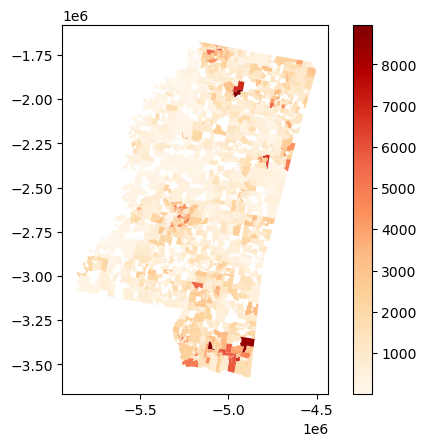

In [56]:
new_prec_data.plot(column='WHITE', cmap='OrRd', legend=True)

# Exploratory Data Analysis

- [ ] Precinct Neighbors
- [ ] MGGG Algorithm
- [ ] Calculate Election Winners
- [ ] Identify Opportunity Districts
- [ ] **Ecological Inference**
